<a href="https://colab.research.google.com/github/NadiaAnwar121/Fashion-MNIST/blob/main/Prodigy_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
data_path = '/content/drive/MyDrive/1 task padgoyy'

os.listdir(data_path)

['Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_6298256.csv',
 'API_SP.POP.TOTL_DS2_en_csv_v2_6298256.csv',
 'Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_6298256.csv']

In [ ]:
import pandas as pd

# File names
population_filename = 'API_SP.POP.TOTL_DS2_en_csv_v2_6298256.csv'
metadata_filename = 'Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_6298256.csv'
indicator_metadata_filename = 'Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_6298256.csv'

# Load data into pandas DataFrames
df_population = pd.read_csv(os.path.join(data_path, population_filename), skiprows=4)
df_country_metadata = pd.read_csv(os.path.join(data_path, metadata_filename))
df_indicator_metadata = pd.read_csv(os.path.join(data_path, indicator_metadata_filename))

# Display the first few rows of each DataFrame to inspect the data
print("Population DataFrame:")
print(df_population.head())

print("\nCountry Metadata DataFrame:")
print(df_country_metadata.head())

print("\nIndicator Metadata DataFrame:")
print(df_indicator_metadata.head())


Population DataFrame:
                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54608.0      55811.0      56682.0      57475.0      58178.0   
1  130692579.0  134169237.0  137835590.0  141630546.0  145605995.0   
2    8622466.0    8790140.0    8969047.0    9157465.0    9355514.0   
3   97256290.0   99314028.0  101445032.0  103667517.0  105959979.0   
4    5357195.0    5441333.0    5521400.0    5599827.0    5673199.0   

          1965  ...         2014         2015         2016         201

In [ ]:
# Merge the three DataFrames on the 'Country Code' column
df_merged = pd.merge(df_population, df_country_metadata, how='left', left_on='Country Code', right_on='Country Code')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Merge the two DataFrames on the 'Country Code' column
df_merged = pd.merge(df_population, df_country_metadata, left_on='Country Code', right_on='Country Code', how='left')
df_merged = pd.merge(df_merged, df_indicator_metadata, left_on='Indicator Code', right_on='INDICATOR_CODE', how='left')


In [ ]:
# Filter out the rows with NaN values in the 'Region' column
df_filtered = df_merged.dropna(subset=['Region'])

In [ ]:
# Count the occurrences of each region
region_counts = df_filtered['Region'].value_counts()

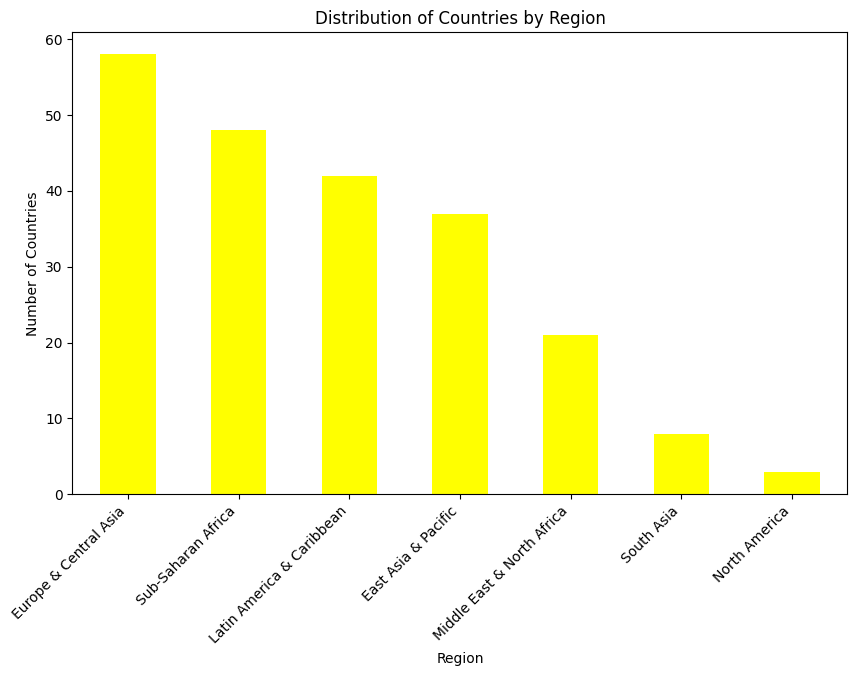

In [ ]:
# Create a bar chart
plt.figure(figsize=(10, 6))
region_counts.plot(kind='bar', color='yellow')
plt.title('Distribution of Countries by Region')
plt.xlabel('Region')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45, ha='right')
plt.show()

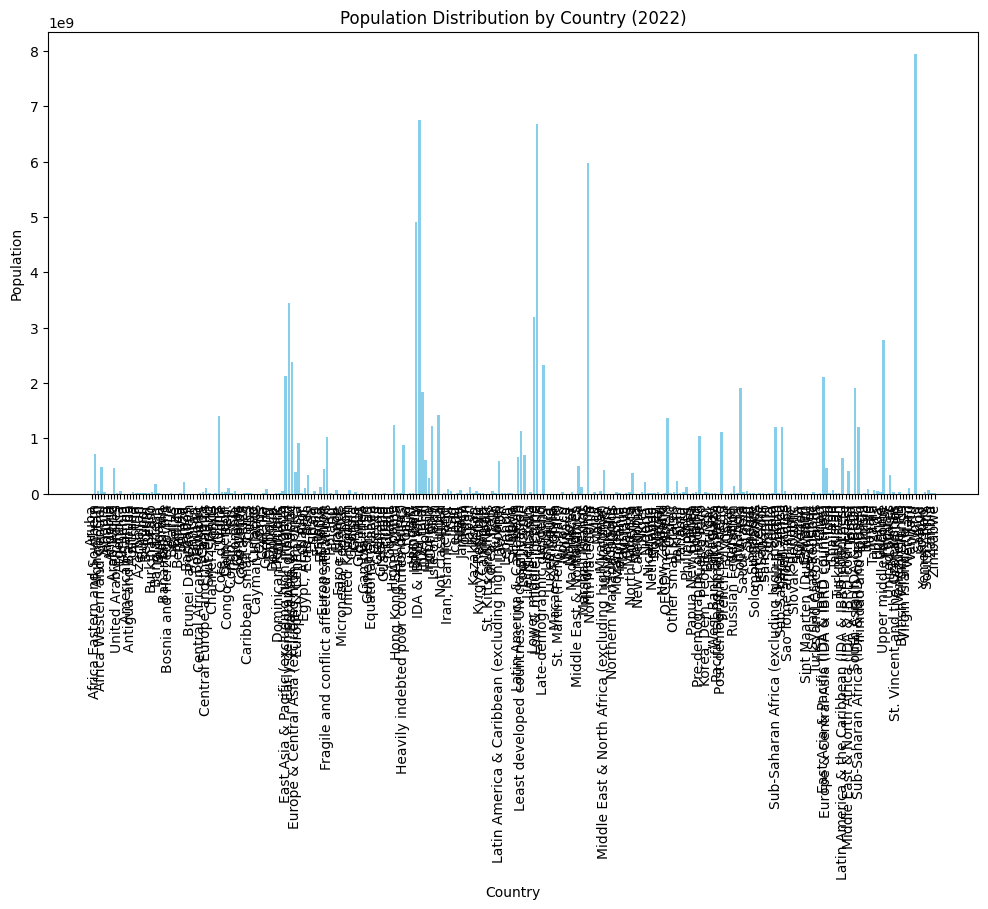

In [ ]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_merged['Country Name'], df_merged['2022'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Population')
plt.title('Population Distribution by Country (2022)')
plt.xticks(rotation=90)
plt.show()